# Dia 3: Otimização e Salvamento do Modelo para Produção

In [1]:
import pandas as pd # pandas para manipulação do nosso dataset
import numpy as np  # numpy para conversão, cálculos mais complexos
import matplotlib.pyplot as plt # matplotlib para exibição de gráficos
import seaborn as sns # seaborn também para exibição de gráficos
from sklearn.preprocessing import MinMaxScaler # normalização de variáveis númericas
from sklearn.model_selection import train_test_split # divisão treino e teste

df = pd.read_csv("./data/telco-customer.csv") # lendo o nosso csv e guardando na variável df
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # convertendo a coluna TotalCharges para float
df = df.dropna() # excluindo valores nulos / NA (Non Available)
categorical_features = df.select_dtypes(include=['object']).columns.tolist() # guardando todas as features categóricas
features_to_remove = ['customerID', 'Churn'] # colunas que queremos remover = customerID desnecessário, e Churn é o nosso alvo/target
for feature in features_to_remove:
    categorical_features.remove(feature)
df_encoded = pd.get_dummies(df, columns=categorical_features) # usando One hot encoding para transformar variaveis categoricas em numericas
df_encoded['Churn'] = df_encoded['Churn'].map({'No':0, 'Yes':1}) # transformando a variável Churn para valores binários
scaler = MinMaxScaler() # instanciamento da classe, transformando os dados para que os valores fiquem entre [0, 1]
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] # separação das features númericas para normalização
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features]) # calcula o mínimo e o máximo de cada coluna, ficando no intervalo [0, 1]
X = df_encoded.drop(['customerID', 'Churn'], axis=1) # nossas features
y = df_encoded['Churn'] # nosso target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # divisão treino e teste

### Dia 2

Acurácia: 0.8024164889836531
Precisão: 0.6454545454545455
Recall: 0.56951871657754
F1-Score: 0.6051136363636364
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



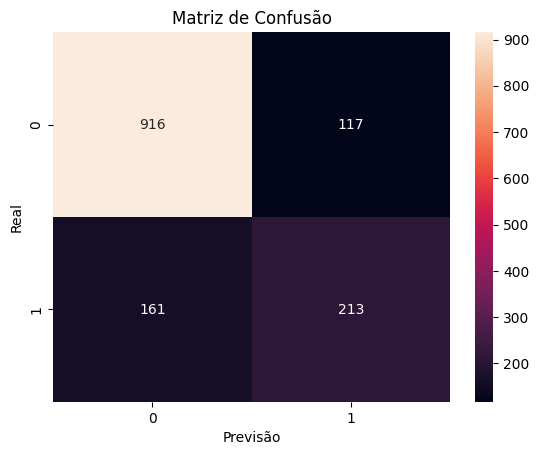

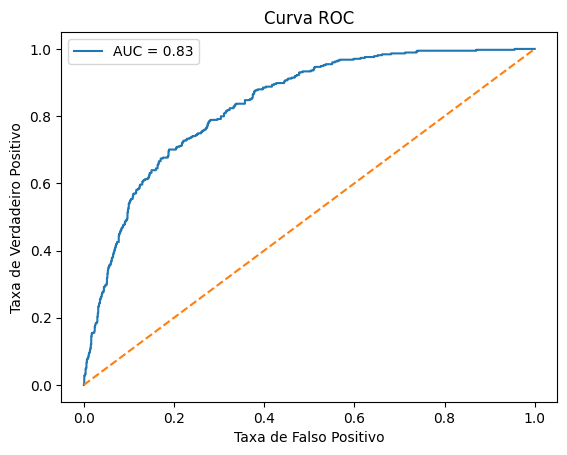

Acurácia média com validação cruzada: 0.80
Acurácia no treino: 0.8046222222222222
Acurácia no teste: 0.8024164889836531
C: 0.01
Acurácia no teste: 0.783226723525231
F1-Score no teste: 0.5371775417298937
C: 0.1
Acurácia no teste: 0.798862828713575
F1-Score no teste: 0.5962910128388017
C: 1
Acurácia no teste: 0.8024164889836531
F1-Score no teste: 0.6051136363636364
C: 10
Acurácia no teste: 0.8031272210376688
F1-Score no teste: 0.6059743954480796
C: 20
Acurácia no teste: 0.8031272210376688
F1-Score no teste: 0.6070921985815603


In [2]:
from sklearn.linear_model import LogisticRegression # importação do modelo de Regressão Logística
# importação das métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix # importação da matriz de confusão
from sklearn.metrics import roc_curve, roc_auc_score # importando curva ROC 
from sklearn.model_selection import cross_val_score # Validação Cruzada
model = LogisticRegression(max_iter=1000) # Inicializando o modelo
model.fit(X_train, y_train) # Treinando o modelo
y_pred = model.predict(X_test) # Previsões no conjunto de teste
# Calculando as métricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) # Relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred) # gerando a matriz de confusão (o array)
sns.heatmap(conf_matrix, annot=True, fmt='d') # criando um mapa de calor com a matriz de confusão
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show() # plotando a matriz
y_prob = model.predict_proba(X_test)[:,1] # Probabilidades de previsão
fpr, tpr, thresholds = roc_curve(y_test, y_prob) # Calculando a curva ROC 
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc)) # Plotando a curva ROC
plt.plot([0,1], [0,1], linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # Avaliando o modelo com validação cruzada
print("Acurácia média com validação cruzada: {:.2f}".format(cv_scores.mean()))
train_pred = model.predict(X_train) # análise de overfitting e underfitting
print("Acurácia no treino:", accuracy_score(y_train, train_pred))
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

# Tuning básico de hiperparâmetros
# Tentando diferentes valores para 'C' na regressão logística
for c in [0.01, 0.1, 1, 10, 20]:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("C:", c)
    print("Acurácia no teste:", accuracy_score(y_test, y_pred))
    print("F1-Score no teste:", f1_score(y_test, y_pred))

# Dia 3: Otimização e Salvamento do Modelo para Produção

## Otimização de Hiperparâmetros

### Usando Grid Search

In [28]:
from imblearn.over_sampling import SMOTE # para oversampling das classes desbalanceadas

Acurácia: 0.8547918683446273
Precisão: 0.8396663577386468
Recall: 0.8770571151984511
F1-Score: 0.8579545454545454
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.84      0.88      0.86      1033

    accuracy                           0.85      2066
   macro avg       0.86      0.85      0.85      2066
weighted avg       0.86      0.85      0.85      2066



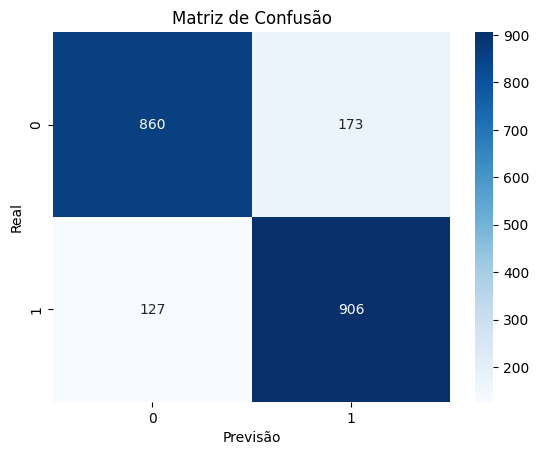

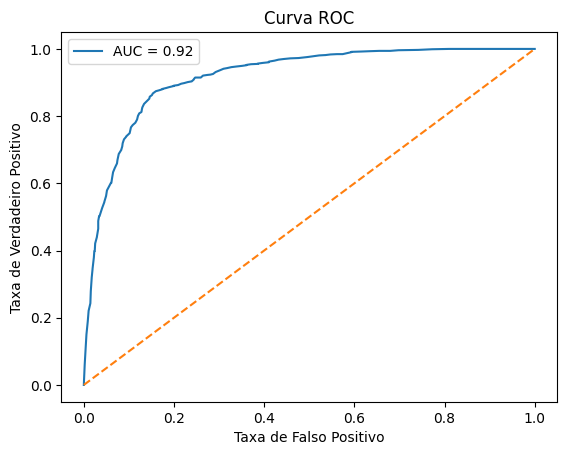

Acurácia no treino: 0.9990314769975787
Acurácia no teste: 0.8547918683446273


In [17]:
# Oversampling com SMOTE
smote = SMOTE(random_state=42) # x = features / y = target/alvo
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Treinando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = rf_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# Curva ROC
y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

# Analisando Overfitting
y_train_pred = rf_model.predict(X_train)
print("Acurácia no treino:", accuracy_score(y_train, y_train_pred))
print("Acurácia no teste:", accuracy_score(y_test, y_pred))


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Executar o Grid Search
grid_search.fit(X_resampled, y_resampled)




Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; tot

### Treinando o Modelo Otimizado


In [19]:
best_model = grid_search.best_estimator_

# Avaliando no conjunto de teste
y_pred = best_model.predict(X_test)
print("Precisão:", precision_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precisão: 0.9819219790675547
F1-Score: 0.9904030710172744


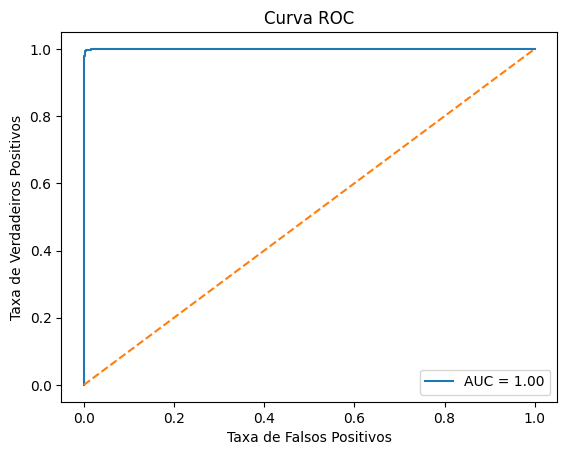

In [29]:
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()


In [27]:
train_pred = best_model.predict(X_train)
print("Acurácia no treino:", accuracy_score(y_train, train_pred))
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("Precisão no treino:", precision_score(y_train, train_pred))
print("Precisão no teste:", precision_score(y_test, y_pred))

Acurácia no treino: 0.9921307506053268
Acurácia no teste: 0.9903194578896418
Precisão no treino: 0.9854310962502986
Precisão no teste: 0.9819219790675547


## Salvando o Modelo Treinado


In [20]:
import joblib

# Salvando o modelo
joblib.dump(best_model, 'best_model_random_forest.pkl')

# Salvando o scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## Testando o Modelo com Novos Dados

### Carregando o modelo

In [30]:
# Carregando o modelo e o scaler
model_loaded = joblib.load('best_model_random_forest.pkl')
scaler_loaded = joblib.load('scaler.pkl')


### Criando um novo exemplo

In [40]:
novo_cliente = {
    'SeniorCitizen': 0,
    'tenure': 3,
    'MonthlyCharges': 85.0,
    'TotalCharges': 500.0,
    'gender_Female': 1,
    'gender_Male': 0,
    'Partner_No': 1,
    'Partner_Yes': 0,
    'Dependents_No': 0,
    'Dependents_Yes': 1,
    'PhoneService_No': 1,
    'PhoneService_Yes': 0,
    'MultipleLines_No': 0,
    'MultipleLines_No phone service': 1,
    'MultipleLines_Yes': 0,
    'InternetService_DSL': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No': 0,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 1,
    'DeviceProtection_No': 1,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'TechSupport_No': 0,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 1,
    'StreamingTV_No': 1,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 0,
    'StreamingMovies_No': 1,
    'StreamingMovies_No internet service': 0,
    'StreamingMovies_Yes': 0,
    'Contract_Month-to-month': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling_No': 0,
    'PaperlessBilling_Yes': 1,
    'PaymentMethod_Bank transfer (automatic)': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0
}

In [41]:
# Convertendo para DataFrame
novo_cliente_df = pd.DataFrame([novo_cliente])
 
# Pré-processamento
# Lembre-se de aplicar as mesmas transformações feitas no conjunto de treino
novo_cliente_df[numeric_features] = scaler_loaded.transform(novo_cliente_df[numeric_features])

In [42]:
predicao = model_loaded.predict(novo_cliente_df)
print("Previsão de churn:", "Sim" if predicao[0] == 1 else "Não")

Previsão de churn: Sim


In [37]:
model_columns = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
    'gender_Female', 'gender_Male',
    'Partner_No', 'Partner_Yes',
    'Dependents_No', 'Dependents_Yes',
    'PhoneService_No', 'PhoneService_Yes',
    'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

Feature ranking:
1. feature tenure (-3.9555498317004885)
2. feature TotalCharges (2.5188183566561833)
3. feature Contract_Two year (-0.736136912799795)
4. feature Contract_Month-to-month (0.6817197340758082)
5. feature InternetService_Fiber optic (0.41605780219148264)
6. feature InternetService_DSL (-0.4110812724635796)
7. feature MonthlyCharges (-0.3013897812003183)
8. feature MultipleLines_No (-0.2559286960659906)
9. feature PaymentMethod_Electronic check (0.22243307351735817)
10. feature OnlineSecurity_No (0.2177459622308633)
11. feature PaperlessBilling_No (-0.21596158330036833)
12. feature OnlineSecurity_Yes (-0.2127694325029733)
13. feature PhoneService_Yes (-0.20474396241151738)
14. feature TechSupport_No (0.19684790024213042)
15. feature SeniorCitizen (0.19321412720711387)
16. feature TechSupport_Yes (-0.19187137051423533)
17. feature Dependents_Yes (-0.18537335613638822)
18. feature PaymentMethod_Bank transfer (automatic) (-0.16259887723149793)
19. feature DeviceProtection_No 

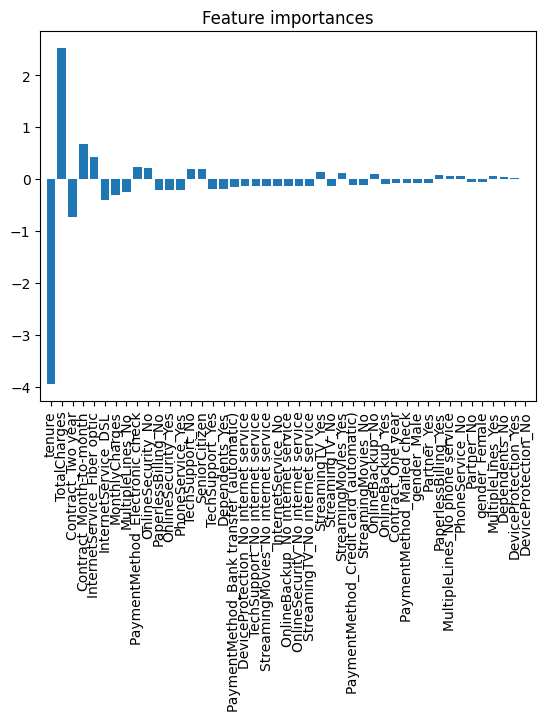

In [38]:
# Obtenha os coeficientes do modelo
coef = model.coef_[0]

# Ordene as importâncias das features
indices = np.argsort(np.abs(coef))[::-1]

# Imprima as features mais importantes
print("Feature ranking:")
for i in range(len(coef)):
    print(f"{i + 1}. feature {model_columns[indices[i]]} ({coef[indices[i]]})")

# Visualize a importância das features
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(coef)), coef[indices], align="center")
plt.xticks(range(len(coef)), [model_columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(coef)])
plt.show()

# -4 se o valor é negativo = cliente tendencia a ficar com a empresa! se é positivo = cliente quer cometer o CHURN -> quer KITAR -> RAGE KIT EXIT()
# tenure= meses que ta com a empresa
# TotalCharges = +2.51
# 

Feature ranking:
1. feature tenure (0.12497520648884242)
2. feature TotalCharges (0.11936641127205384)
3. feature MonthlyCharges (0.10965582996935098)
4. feature Contract_Month-to-month (0.1045002407086102)
5. feature OnlineSecurity_No (0.04911344524253565)
6. feature TechSupport_No (0.0414939094462916)
7. feature PaymentMethod_Electronic check (0.03873402820435091)
8. feature Contract_Two year (0.028486468536422043)
9. feature InternetService_Fiber optic (0.02804619255507496)
10. feature OnlineBackup_No (0.01793723663250984)
11. feature PaperlessBilling_Yes (0.016404211216747407)
12. feature DeviceProtection_No (0.01577195980347097)
13. feature gender_Female (0.01572276218208338)
14. feature gender_Male (0.015107976735910137)
15. feature Contract_One year (0.01328485745697536)
16. feature Partner_No (0.013244511226634594)
17. feature SeniorCitizen (0.013210632619427039)
18. feature Dependents_No (0.012914448906615578)
19. feature Partner_Yes (0.012590803535167207)
20. feature PaymentM

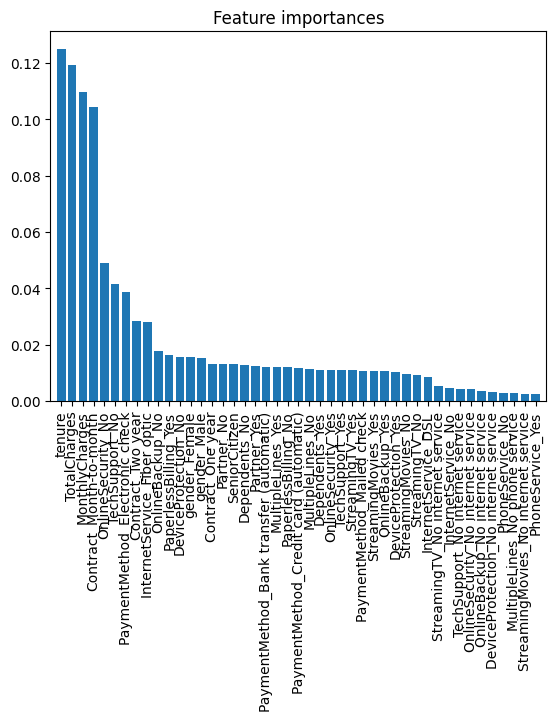

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Supondo que você já tenha seu modelo treinado
model_for_features = RandomForestClassifier().fit(X_train, y_train)

# Extraia a importância das features
importances = model_for_features.feature_importances_

# Ordene as importâncias das features
indices = np.argsort(importances)[::-1]

# Imprima as features mais importantes
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {model_columns[indices[f]]} ({importances[indices[f]]})")

# Visualize a importância das features
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [model_columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Conclusão

No terceiro dia, otimizamos nosso modelo usando Grid Search, salvamos o modelo treinado e o scaler,testamos o modelo com novos dados e descobrimos as features mais importantes. 

### Já pode deployar? 🙅‍♂️ 
